### Анализ убытков приложения ProcrastinatePRO+

Несколько прошлых месяцев бизнес постоянно нес убытки - в привлечение пользователей была вложена куча денег, а толку никакого. Необходимо разобраться в причинах этой ситуации.

В нашем распоряжении есть лог сервера с данными о посещениях приложения новыми пользователями, зарегистрировавшимися в период с 2019-05-01 по 2019-10-27, выгрузка их покупок за этот период, а также статистика рекламных расходов. 

**Цель исследования**:
1. Изучить, как люди пользуются продуктом, когда они начинают покупать, сколько денег приносит каждый клиент, когда он окупается и какие факторы отрицательно влияют на привлечение пользователей.

**Ход исследования**

Проведем предобработку данных. Проверим данные на ошибки и оценим их влияние на исследование. Затем, на этапе предобработки выявим возможность исправить самые критичные ошибки данных.

Затем зададдим функции для расчета и анализа LTV, ROI, удержания и конверсии. Проведем исследовательский анализ данных. Построим профили пользователей. Определите минимальную и максимальную дату привлечения пользователей.

Далее выясним:
- Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?
- Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?
- По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?.

Также проанализируем маркетинг и выясним:
- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько в среднем стоило привлечение одного покупателя из каждого источника?

Затем оценим окупаемость рекламы для привлечения пользователей:

С помощью LTV и ROI:
- Проанализируйте общую окупаемость рекламы;
- Проанализируйте окупаемость рекламы с разбивкой по устройствам;
- Проанализируйте окупаемость рекламы с разбивкой по странам;
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам.

В последствии попытаемся ответить на вопросы:

- Окупается ли реклама, направленная на привлечение пользователей в целом? 
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости? Изучите конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам.

В конце напишем общий вывод.
 
Таким образом, исследование пройдёт в несколько этапов:
 1. Изучение общей информации.
 2. Предобработка данных.
 3. Написание функции для расчета и анализа LTV, ROI, удержания и конверсии.
 4. Исследовательский анализ данных.
 5. Маркетинг.
 6. Оценка окупаемости рекламы для привлечения пользователей.
 7. Общий вывод.

### Анализ убытков приложения ProcrastinatePRO+.
_____

###### Данное исследование разделим на несколько частей.

#### Часть 1. Изучение данных из файла и предобработка данных:
* [1. Изучение файлов с данными, получение общей информации, загрузка библиотек, предобработка данных.](#1-bullet)
#### Часть 2. Написание функции для расчета и анализа LTV, ROI, удержания и конверсии:
* [1. Функция для создания профилей пользователей.](#2-bullet)
* [2. Функция для подсчёта Retention Rate.](#3-bullet)
* [3. Функция для подсчёта конверсии.](#4-bullet)
* [4. Функция для подсчёта LTV.](#5-bullet)
* [5. Функция для сглаживания данных.](#6-bullet)
* [6. Функция для построения графика Retention Rate.](#7-bullet)
* [7. Функция для построения графика конверсии.](#8-bullet)
* [8. Функция для визуализации LTV и ROI.](#9-bullet)
#### Часть 4. Исследовательский анализ данных:
* [1. Определение минимальной и максимальной даты привлечения пользователей.](#10-bullet)
* [2. Анализ конверсии платящих пользователей.](#11-bullet)
#### Часть 5. Маркетинг:
* [1. Анализ затрат на рекламу.](#12-bullet)
* [2. Анализ стоимости привлечения одного пользователя.](#13-bullet)
#### Часть 6. Оценка окупаемости рекламы для привлечения пользователей:
* [1. Анализ общей окупаемости рекламы.](#14-bullet)
* [2. Анализ окупаемости рекламы с разбивкой по устройствам.](#15-bullet)
* [3. Анализ окупаемости рекламы с разбивкой по рекламным каналам.](#16-bullet)
* [4. Анализ окупаемости рекламы с разбивкой по странам.](#17-bullet)
* [5. Анализ конверсии и удержания с разбивкой по устройствам, странам, рекламным каналам.](#18-bullet)
##### Итоги исследования

## Изучение данных из файла и предобработка данных

<a id='1-bullet'></a>
### Изучение файлов с данными, получение общей информации, загрузка библиотек, предобработка данных.

In [1]:
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import numpy as np
import math #импорт библиотеки math
from scipy import stats as st #импорт библиотеки stats
import seaborn as sns

In [2]:
visits = pd.read_csv("D:\\Programs\\visits_info_short.csv", parse_dates=['Session Start','Session End'])


In [3]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   User Id        309901 non-null  int64         
 1   Region         309901 non-null  object        
 2   Device         309901 non-null  object        
 3   Channel        309901 non-null  object        
 4   Session Start  309901 non-null  datetime64[ns]
 5   Session End    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


Таблица visits_log_short (лог сервера с информацией о посещениях сайта):

    User Id — уникальный идентификатор пользователя
    Device — категория устройства пользователя
    Session start — дата и время начала сессии
    Session End — дата и время окончания сессии
    Channel — идентификатор рекламного источника, из которого пришел пользователь
    Region - страна пользователя

Приведем столбцы к нижнему регистру и 'змеиному' стилю

In [4]:
visits = visits.rename( 
 columns={ 
'User Id': 'user_id', 
'Session Start': 'session_start', 
'Session End': 'session_end'
 } 
)

In [5]:
visits.columns = visits.columns.str.lower() #приведение столбцов к нижнему регистру
visits.columns

Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object')

In [6]:
visits.isna().sum()

user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64

In [7]:
visits.duplicated().sum()

0

In [8]:
orders = pd.read_csv("D:\\Programs\\orders_info_short.csv", parse_dates=['Event Dt'])

In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   User Id   40212 non-null  int64         
 1   Event Dt  40212 non-null  datetime64[ns]
 2   Revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


Таблица orders_log_short (информация о заказах):

    User Id — уникальный id пользователя, который сделал заказ
    Event Dt — дата и время покупки
    Revenue — выручка

In [10]:
orders = orders.rename( 
 columns={ 
'User Id': 'user_id', 
'Event Dt': 'event_dt', 
'Revenue': 'revenue'
 } 
)

In [11]:
orders.columns

Index(['user_id', 'event_dt', 'revenue'], dtype='object')

In [12]:
orders.isna().sum()

user_id     0
event_dt    0
revenue     0
dtype: int64

In [13]:
orders.duplicated().sum()

0

In [14]:
costs = pd.read_csv("D:\\Programs\\costs_info_short.csv")

In [15]:
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [16]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


Таблица costs_short (информация о затратах на маркетинг):

    Channel — идентификатор рекламного источника
    Dt — дата
    Costs — затраты на этот рекламный источник в этот день

In [17]:
costs.columns = costs.columns.str.lower() #приведение столбцов к нижнему регистру
costs.columns

Index(['dt', 'channel', 'costs'], dtype='object')

In [18]:
costs.isna().sum()

dt         0
channel    0
costs      0
dtype: int64

In [19]:
costs.duplicated().sum()

0

#### Вывод

Датафреймы не имеют пропусков и дубликатов. Названия столбцов приведены к нижнему регистру и в соотвествии с принятым стилем.

## Написание функции для расчета и анализа LTV, ROI, удержания и конверсии.

Зададим функции для расчета и анализа LTV, ROI, удержания и конверсии

<a id='2-bullet'></a>
### Функция для создания профилей пользователей.

In [20]:
def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    
    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

<a id='3-bullet'></a>
### Функция для подсчёта Retention Rate.

In [21]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

<a id='4-bullet'></a>
### Функция для подсчёта конверсии.

In [22]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

<a id='5-bullet'></a>
### Функция для подсчёта LTV.

In [23]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

<a id='6-bullet'></a>
### Функция для сглаживания данных.

In [24]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

<a id='7-bullet'></a>
### Функция для построения графика Retention Rate.

In [25]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

<a id='8-bullet'></a>
### Функция для построения графика конверсии.

In [26]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

<a id='9-bullet'></a>
### Функция для визуализации LTV и ROI.

In [27]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

## Исследовательский анализ данных

<a id='10-bullet'></a>
### Определение минимальной и максимальной даты привлечения пользователей.

Получим профили пользователей

In [28]:
profiles = get_profiles(visits, orders, costs)
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


Определим максимальную и минимальную дату привлечения пользователей

In [29]:
min_dt=profiles['dt'].min()
min_dt

datetime.date(2019, 5, 1)

In [30]:
max_dt = profiles['dt'].max()
max_dt

datetime.date(2019, 10, 27)

In [31]:
suitable_date = datetime(2019, 10, 1).date() - timedelta(
            days=13
        )
(profiles.query('dt <= @suitable_date')['user_id'].nunique()/profiles['user_id'].nunique())*100

75.0726627913178

При сопоставлении дат привлечения пользователей с вводными данными по проекту, подходящими для анализа оказались 75 процентов пользователей.

<a id='11-bullet'></a>
### Анализ конверсии платящих пользователей.

In [32]:
country_users = profiles.groupby('region').agg({'user_id':'nunique'}).reset_index().rename(columns={'user_id':'all_users'})
country_payer = profiles.query('payer==True').groupby('region').agg({'user_id':'nunique'}).reset_index().rename(columns={'user_id':'paying_users'})
country_users=country_users.merge(country_payer, on='region', how='left')
country_users['conversion'] = country_users['paying_users']/country_users['all_users']
country_users = country_users.drop(columns=['paying_users'])
country_users.sort_values(by='conversion',ascending=False)

,region,all_users,conversion
3,United States,100002,0.069019
1,Germany,14981,0.041119
2,UK,17575,0.039829
0,France,17450,0.037994


Из таблицы следует, что лучше всего в платящих пользователей конвертируются в США.

In [33]:
device_users = profiles.groupby('device').agg({'user_id':'nunique'}).reset_index().rename(columns={'user_id':'all_users'})
device_payer = profiles.query('payer==True').groupby('device').agg({'user_id':'nunique'}).reset_index().rename(columns={'user_id':'paying_users'})
device_users=device_users.merge(device_payer, on='device', how='left')
device_users['conversion'] = device_users['paying_users']/device_users['all_users']
device_users = device_users.drop(columns=['paying_users'])
device_users.sort_values(by='conversion',ascending=False)

,device,all_users,conversion
1,Mac,30042,0.063644
3,iPhone,54479,0.062079
0,Android,35032,0.058518
2,PC,30455,0.050468


Из таблицы следует, что лучше всего в платящих пользователей конвертируются владельцы `Iphone` и `Mac`. 

In [34]:
channel_users = profiles.groupby('channel').agg({'user_id':'nunique'}).reset_index().rename(columns={'user_id':'all_users'})
channel_payer = profiles.query('payer==True').groupby('channel').agg({'user_id':'nunique'}).reset_index().rename(columns={'user_id':'paying_users'})
channel_users=channel_users.merge(channel_payer, on='channel', how='left')
channel_users['conversion'] = channel_users['paying_users']/channel_users['all_users']
channel_users = channel_users.drop(columns=['paying_users'])
channel_users.sort_values(by='conversion',ascending=False)

,channel,all_users,conversion
1,FaceBoom,29144,0.122049
0,AdNonSense,3880,0.113402
9,lambdaMediaAds,2149,0.104700
6,TipTop,19561,0.096007
5,RocketSuperAds,4448,0.079137
7,WahooNetBanner,8553,0.052964
8,YRabbit,4312,0.038265
3,MediaTornado,4364,0.035747
2,LeapBob,8553,0.030633
4,OppleCreativeMedia,8605,0.027077


Лучше всего в платящих пользователей пользователей конвертируются посетители из каналов `FaceBoom`, `AdNonSense` и `lambdaMediaAds`, а также `TipTop`.

## Маркетинг.

<a id='12-bullet'></a>
### Анализ затрат на рекламу.

Выясним сколько всего было потрачено денег

In [35]:
costs['costs'].sum()

105497.30000000002

Всего денег на рекламу было потрачено 105498 долларов

In [36]:
costs.head()

,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


Выясним сколько было потрачено денег на каждый источник

<AxesSubplot:title={'center':'Количество денег на каждый источник'}, xlabel='Источник', ylabel='Количество денег'>

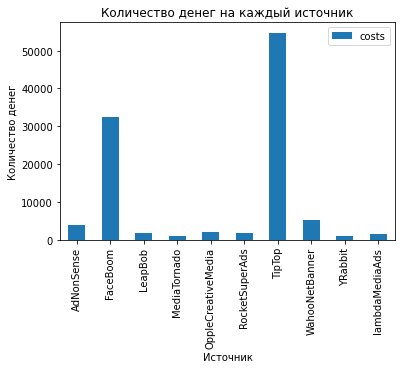

In [37]:
costs.groupby('channel').sum().reset_index().plot(x='channel',y='costs', kind='bar',title='Количество денег на каждый источник',xlabel='Источник',ylabel='Количество денег')

Больше всего денег было потрачено на каналы `TipTop` и `FaceBoom`

In [38]:
costs['month']=costs['dt'].astype('datetime64[M]')

In [39]:
sum_costs=costs.groupby(['month','channel']).agg({'costs':'sum'}).reset_index()

<AxesSubplot:title={'center':'Количество денег на каждую дату'}, xlabel='Дата', ylabel='Количество денег'>

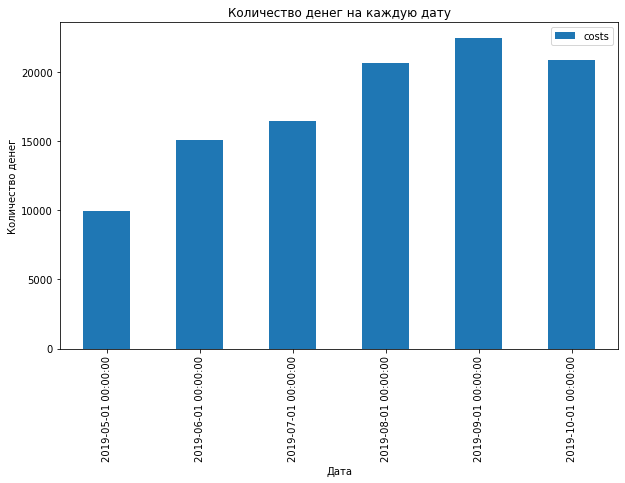

In [40]:
sum_costs.groupby('month').sum().reset_index().plot(x='month',y='costs', kind='bar',title='Количество денег на каждую дату',xlabel='Дата',ylabel='Количество денег',figsize=[10,6])

Расходы на рекламы постпенно увеличивались. 

<AxesSubplot:title={'center':'Расходы на привлечение по месяцам'}, xlabel='Месяц', ylabel='Затраты,$'>

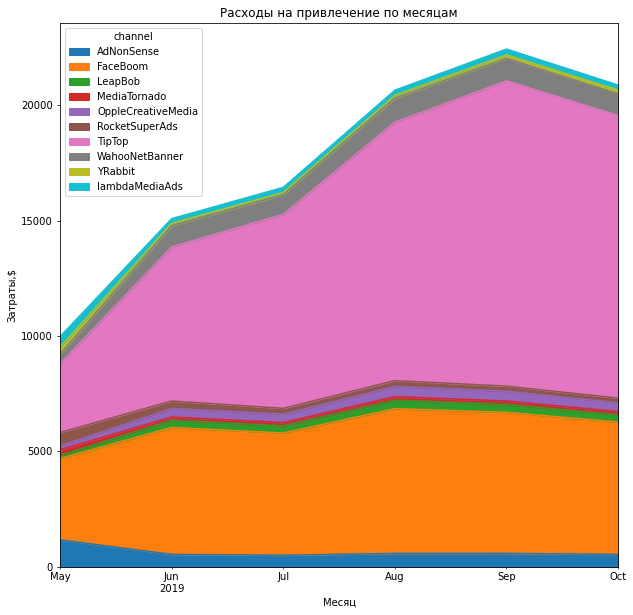

In [41]:
sum_costs.pivot_table(index='month',columns='channel',values='costs').plot.area(figsize=(10,10)
                                                                            ,title ='Расходы на привлечение по месяцам'
                                                                            ,xlabel='Месяц'
                                                                            ,ylabel='Затраты,$')


Больше всего площадь фигур у каналов `TipTop` и `FaceBoom`. Отсюда можно сделать вывод, что на эти каналы тратилось больше всего средств. Стоит отметить, что в динамике площадь фигуры становится больше у канала `TipTop`, что говорит о повышении трат на рекламу в этом канале со временем.

<a id='13-bullet'></a>
### Анализ стоимости привлечения одного пользователя.

Узнаем сколько в среднем стоило привлечение одного пользователя для проекта

In [42]:
profiles_not_organic = profiles.query('channel != "organic"')
profiles_not_organic['acquisition_cost'].mean()

1.127481323942928

Привлечение одного пользователя для проекта, в среднем, стоило 1.13 долларов.

<AxesSubplot:title={'center':'Средний CAC для каждого источника трафика'}, xlabel='Канал', ylabel='САС'>

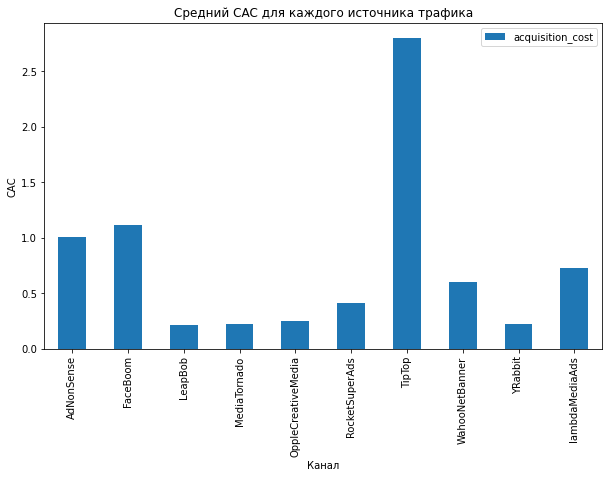

In [43]:
profiles_not_organic.groupby('channel').agg({'acquisition_cost':'mean'}).reset_index().plot(x='channel',y='acquisition_cost', kind='bar',title='Средний CAC для каждого источника трафика',xlabel='Канал',ylabel='САС',figsize=[10,6])

В среднем, стоимость привлечения одного клиента выше всего у канала `TipTop`. Затем следуют `AdNonSense` и `FaceBoom`

## Оценка окупаемости рекламы для привлечения пользователей.

<a id='14-bullet'></a>
### Анализ общей окупаемости рекламы.

In [44]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles_not_organic,
    orders,
    datetime(2019, 10, 1).date(),
    14,
    dimensions=[],
    ignore_horizon=False,
)

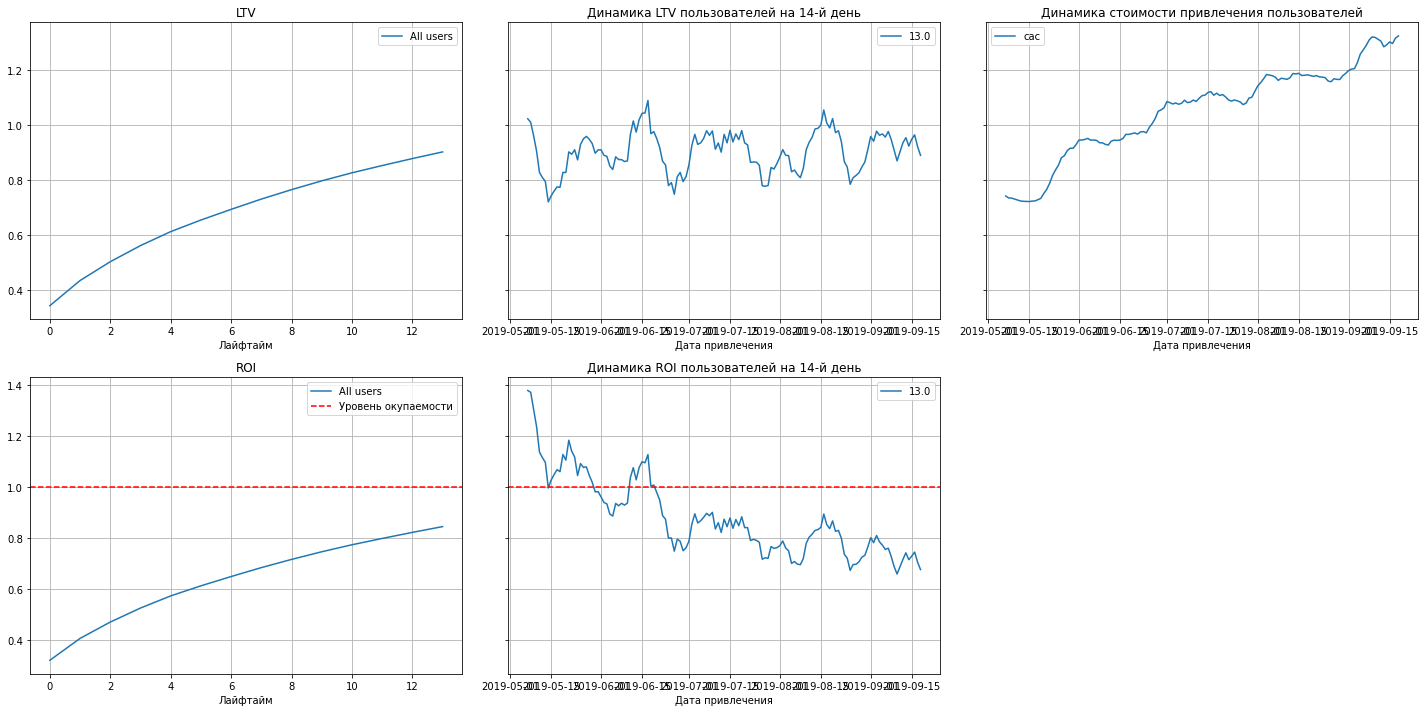

In [45]:
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14, window=7)

По графикам можно сделать вывод, что, в общем, реклама не окупается. Но в динамике окупаемость рекламы на 14 день падает со временем, а динамика стоимости привлечения одного клиента растет. LTV в динамике остается практически неизменным.

<a id='15-bullet'></a>
### Анализ окупаемости рекламы с разбивкой по устройствам.

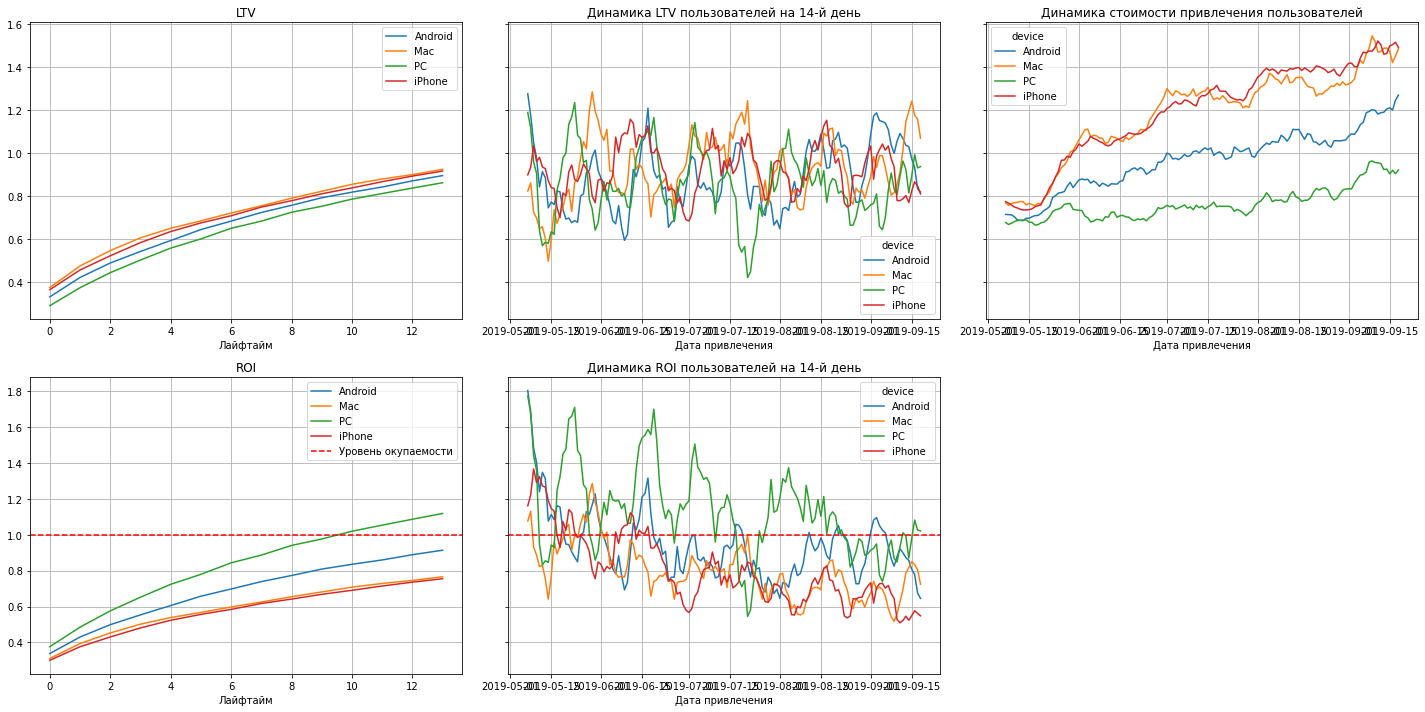

In [46]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles_not_organic,
    orders,
    datetime(2019, 10, 1).date(),
    14,
    dimensions=['device'],
    ignore_horizon=False,
)
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14, window=7)

Рекламные кампании `PC` окупаются, а у `Mac`, `iPhone` и `Android` нет. Динамика стоимости привлечения пользователей постепенно увеличивалась и больше всех у `Mac` и `iPhone`. Динамика ROI на 14-й день пользователей постепенно снижается со временем. 

<a id='16-bullet'></a>
### Анализ окупаемости рекламы с разбивкой по рекламным каналам.

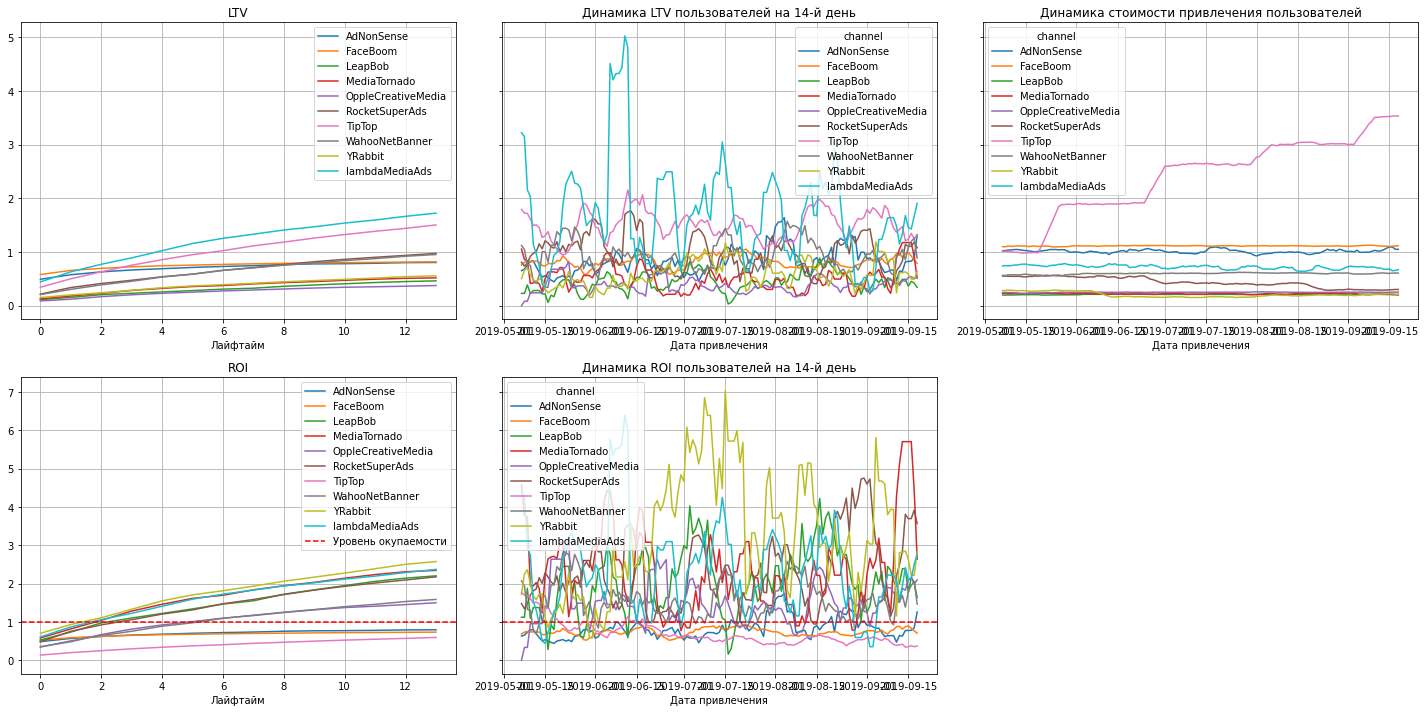

In [47]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles_not_organic,
    orders,
    datetime(2019, 10, 1).date(),
    14,
    dimensions=['channel'],
    ignore_horizon=False,
)
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14, window=7)

Судя по графикам реклама на площадках `AdNonSense`,`TipTop` и `FaceBoom` не окупается. В то время как остальные окупаются уже на 5 день. Затраты на рекламу на всех площадках были стабильны, кроме `tipTop`, где затраты только росли. Динамика ROI стабильно ниже окупаемости у `AdNonSense`,`TipTop` и `FaceBoom`.

<a id='17-bullet'></a>
### Анализ окупаемости рекламы с разбивкой по странам.

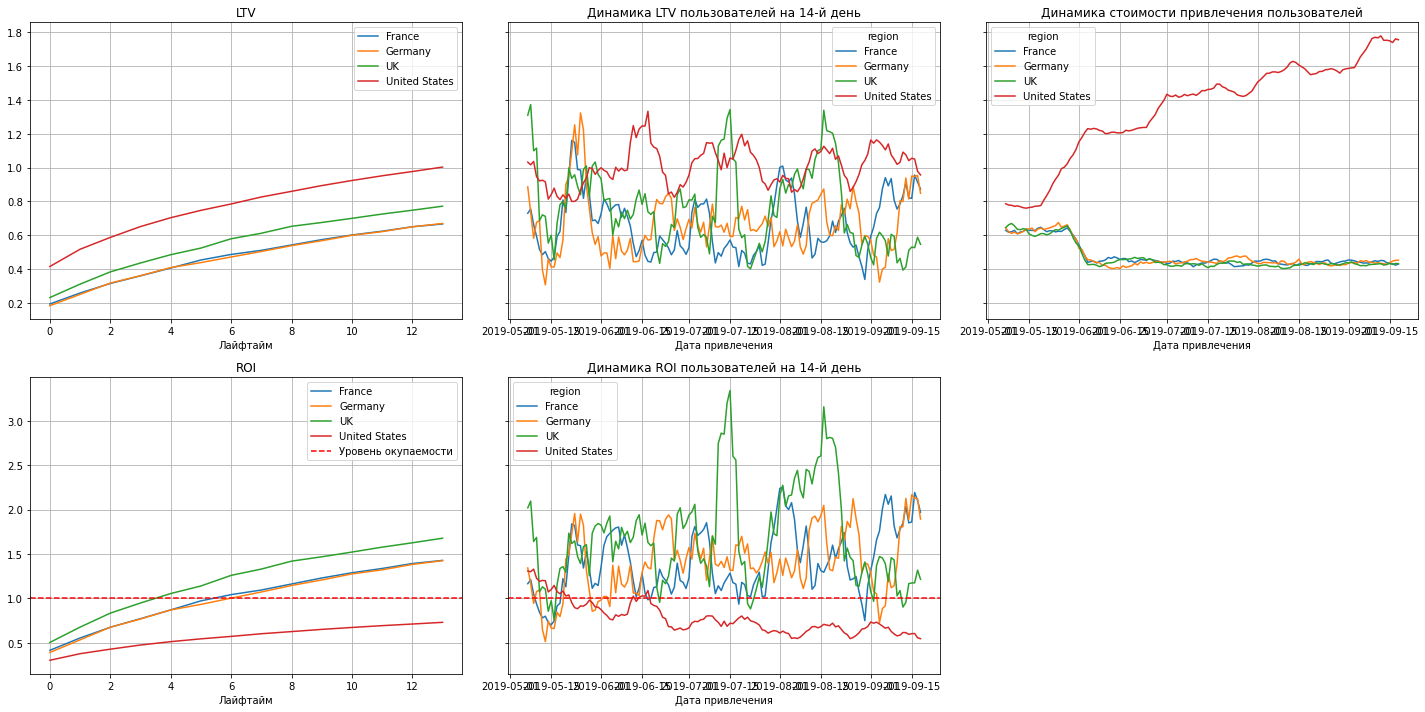

In [48]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles_not_organic,
    orders,
    datetime(2019, 10, 1).date(),
    14,
    dimensions=['region'],
    ignore_horizon=False,
)
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14, window=7)

Рекламные кампании в США не окупаются, при этом стоимость привлечения клиентов росла. Реклама в других странах окупается на 6 день. Стоимость привлечения клиентов из США росла, в то время как у других стран стоимость снизилась в конце мая - начало июня. Динамика окупаемости клиентов из США стабильно низкая, в то время как у других стран, в целом, она стабильна, кроме Великобритании, где в середине июля и августе наблюдались вспышки роста ROI.

<a id='18-bullet'></a>
### Анализ конверсии и удержания с разбивкой по устройствам, странам, рекламным каналам.

Построим также графики конверсии и удержания с разбивкой по устройствам, странам, рекламным каналам.

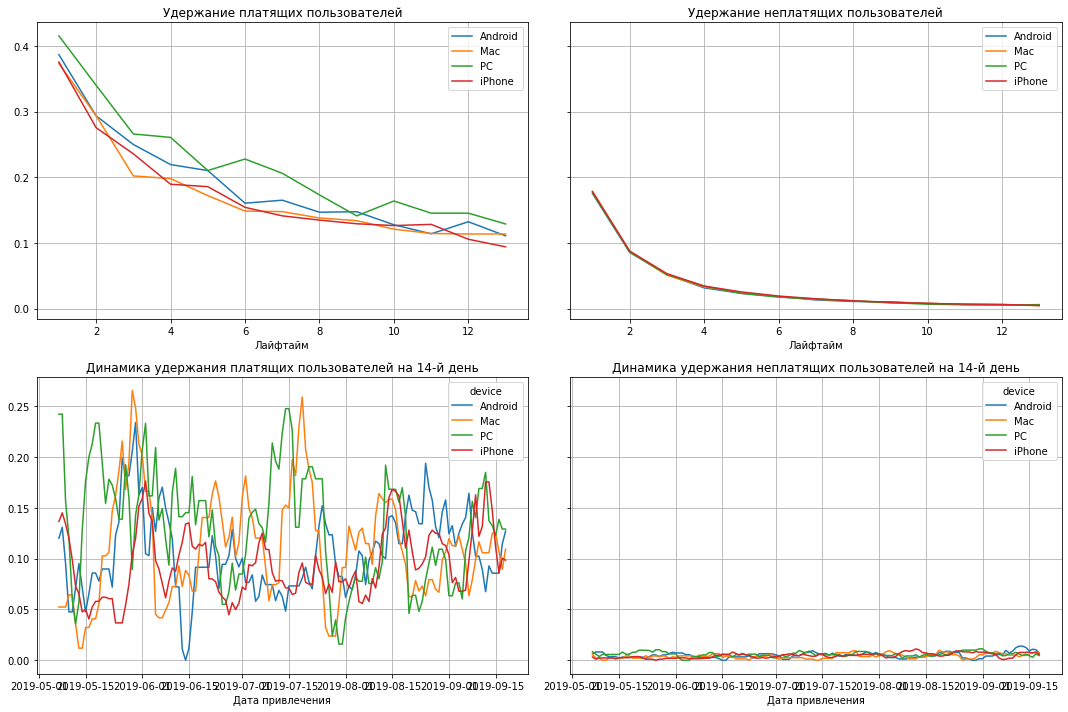

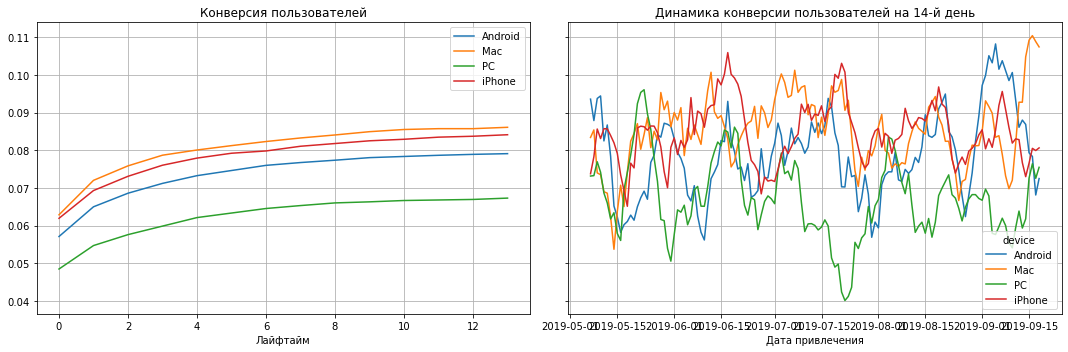

In [49]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_not_organic,
    visits,
    datetime(2019, 10, 1).date(),
    14,
    dimensions=['device'],
    ignore_horizon=False,
)
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_not_organic,
    orders,
    datetime(2019, 10, 1).date(),
    14,
    dimensions=['device'],
    ignore_horizon=False,
)
plot_retention(retention_grouped, retention_history, 14)
plot_conversion(conversion_grouped, conversion_history, 14)

Конверсия пользователей хуже всего у `PC`, но удержание лучше всех. Остальные же устройства мало чем отличаются друг от друга по показателям

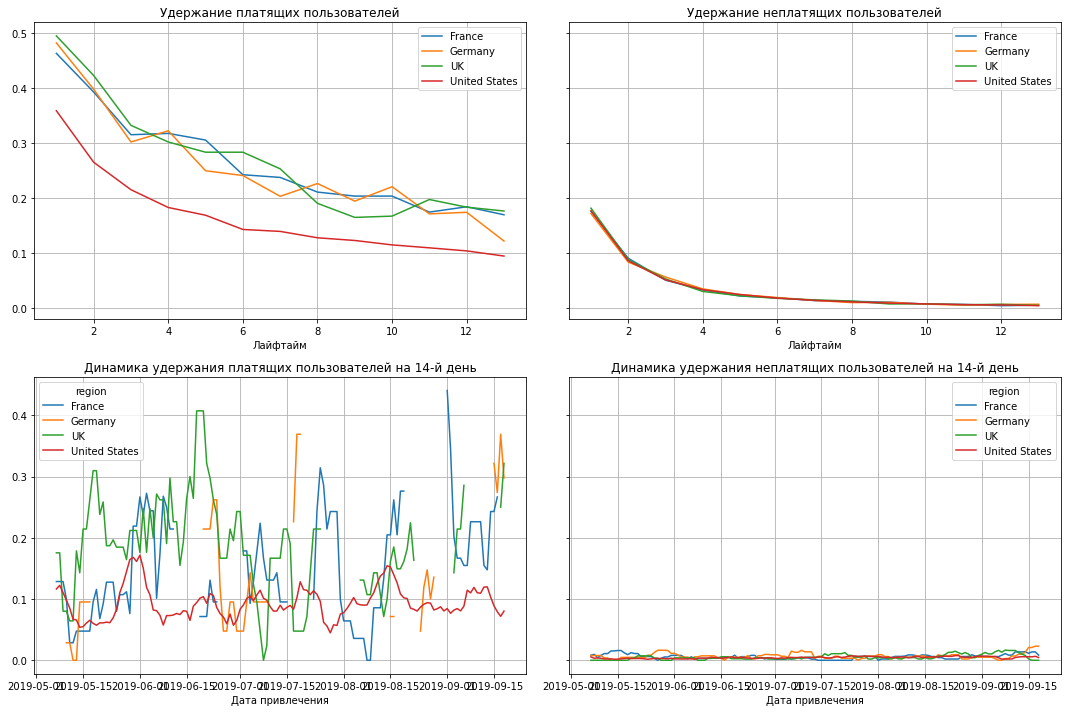

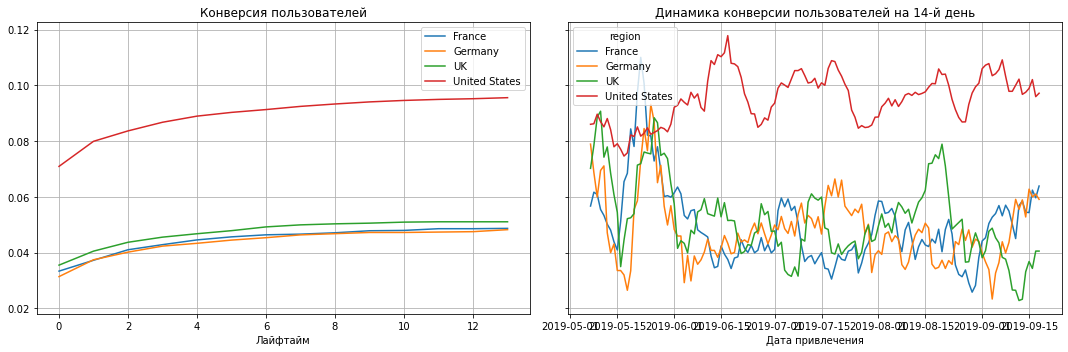

In [50]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_not_organic,
    visits,
    datetime(2019, 10, 1).date(),
    14,
    dimensions=['region'],
    ignore_horizon=False,
)
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_not_organic,
    orders,
    datetime(2019, 10, 1).date(),
    14,
    dimensions=['region'],
    ignore_horizon=False,
)
plot_retention(retention_grouped, retention_history, 14)
plot_conversion(conversion_grouped, conversion_history, 14)

США показывает самые лучшие показатели конверсии пользователей, но и самые худшие показатели удержания пользователей

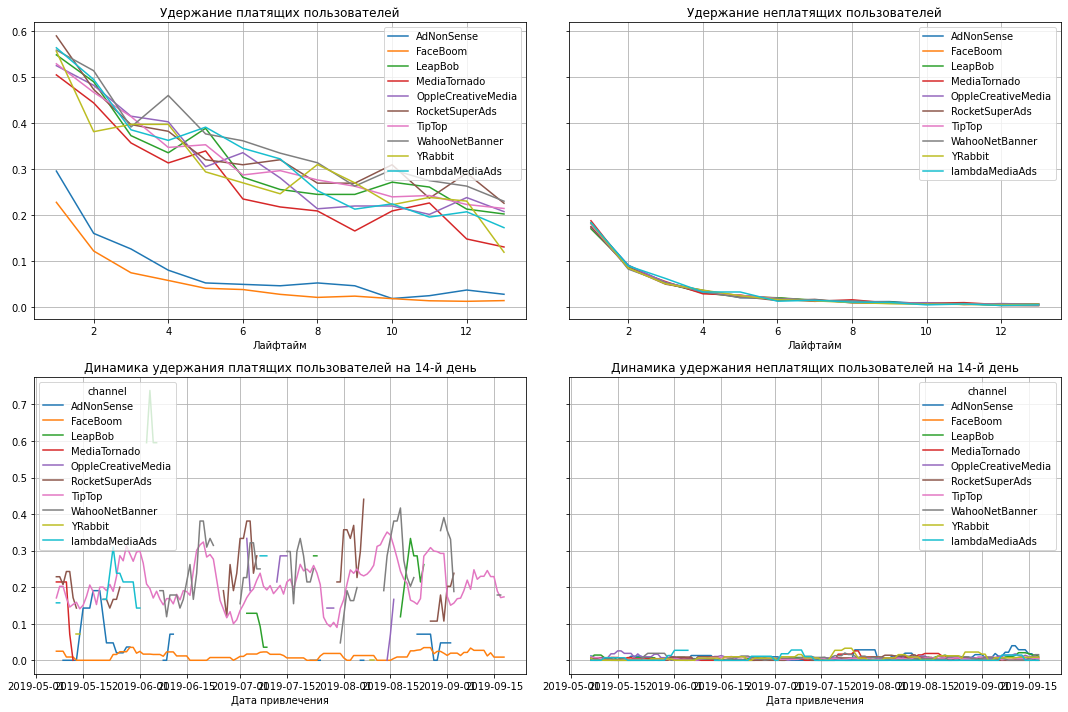

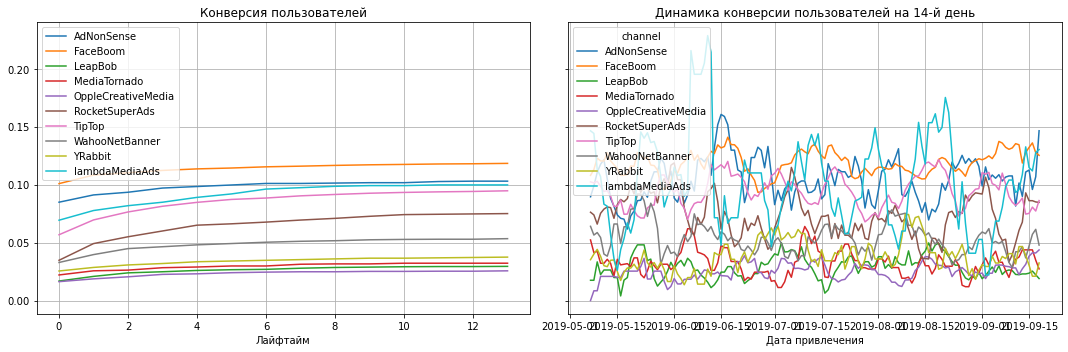

In [51]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_not_organic,
    visits,
    datetime(2019, 10, 1).date(),
    14,
    dimensions=['channel'],
    ignore_horizon=False,
)
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_not_organic,
    orders,
    datetime(2019, 10, 1).date(),
    14,
    dimensions=['channel'],
    ignore_horizon=False,
)
plot_retention(retention_grouped, retention_history, 14)
plot_conversion(conversion_grouped, conversion_history, 14)

У канала `FaceBoom` и `AdNonSense` самые низкие показатели удержания платящих пользователей. Однако конверсии выше остальных.

### Вывод

Судя по графику общему графику ROI реклама не окупается.

`iPhone` и `Mac` и `Android` не окупают затраты на рекламу, при этом имея конверсию выше других устройств, но ниже удержания пользователей.


`AdNonSense`,`TipTop` и `FaceBoom` не окупается. Также имеют самые высокие конверсии пользователей, но низкое удержание.

Рекламные кампании в США не окупаются. Также имеют самые высокие конверсии пользователей, но низкое удержание.

Все названые страны, устройства и рекламные площадки имеются самые высокие затраты на привлечения пользователей. Следует повысить удержание клиентов.

## Общий вывод.

В отчете были отражены некотрые страны, устройства и площадки с низкой окупаемостью. 

Только в США реклама не окупается. Она не окупается из-за больших затрат на рекламу и низкого удержания пользователей. При этом следует отметить, что 78 % пользователей находятся в США. Следует, перераспределить затраты на рекламу на другие страны, так как они мало представлены в числе пользователей.

Рекламные кампании  `PC` окупаются, а у `Android`, `Mac` и `iPhone` нет. Пользователей пользующихся `iPhone` на 15 % больше, чем пользователей других устройств. Следует повысить удержание пользователей `Mac` и `iPhone`, так как у этих устройств высокие показатели конверсии, но низкое удержание пользователей. 

`AdNonSense`,`TipTop` и `FaceBoom` не окупается. Также имеют самые высокие конверсии пользователей, но низкое удержание. 

Лучше всех себя показали каналы `lambdaMediaAds`, `RocketSuperAds`, `YRabbit`, `MediaTornado`, `LeapBob`. Эти каналы имеют высокие показатели ROI. Среди них `lambdaMediaAds` и `RocketSuperAds` имеют большую конверсию и удержание пользователей, чем другие каналы из подборки.

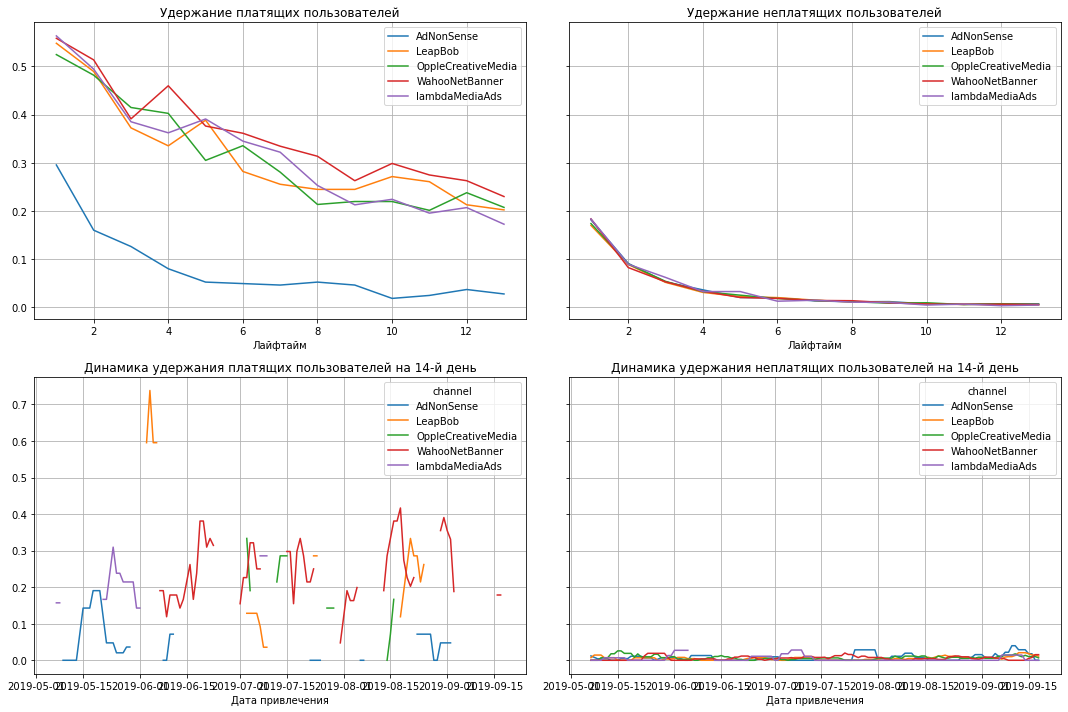

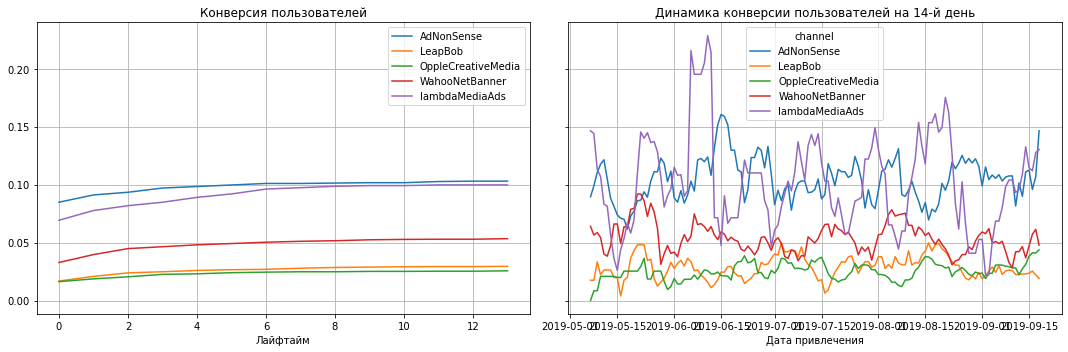

In [52]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_not_organic.query('region !="United States"'),
    visits,
    datetime(2019, 10, 1).date(),
    14,
    dimensions=['channel'],
    ignore_horizon=False,
)
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_not_organic.query('region !="United States"'),
    orders,
    datetime(2019, 10, 1).date(),
    14,
    dimensions=['channel'],
    ignore_horizon=False,
)
plot_retention(retention_grouped, retention_history, 14)
plot_conversion(conversion_grouped, conversion_history, 14)


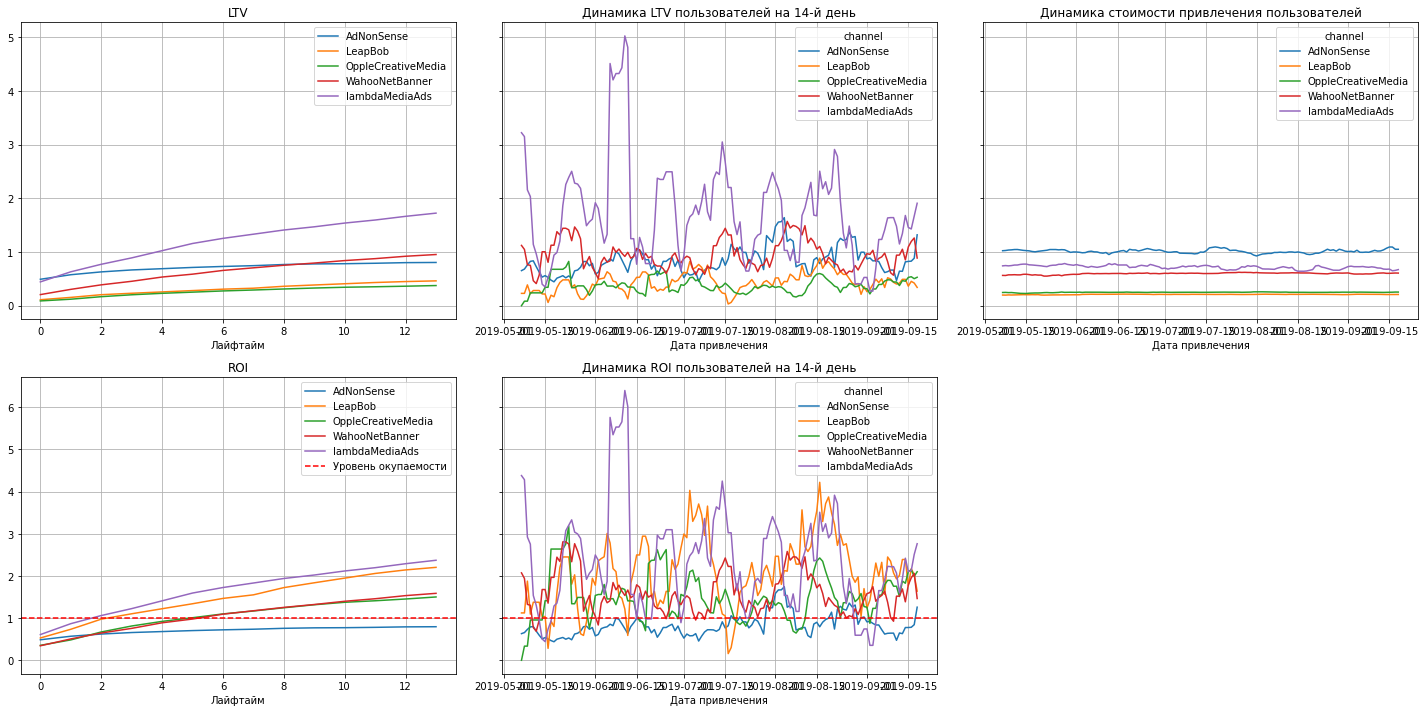

In [53]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles_not_organic.query('region !="United States"'),
    orders,
    datetime(2019, 10, 1).date(),
    14,
    dimensions=['channel'],
    ignore_horizon=False,
)
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14, window=7)

Для европейского рынка следует распределить бюджет между `lambdaMediaAds`,`LeapBob`, `WahooNetBanner` и `OppleCreativeMedia`. Так как их реклама окупается. Стоит отметить, что у `LeapBob` и `OppleCreativeMedia` низкие показатели конверсии, что может быть связано с низкими затратами на рекламу.

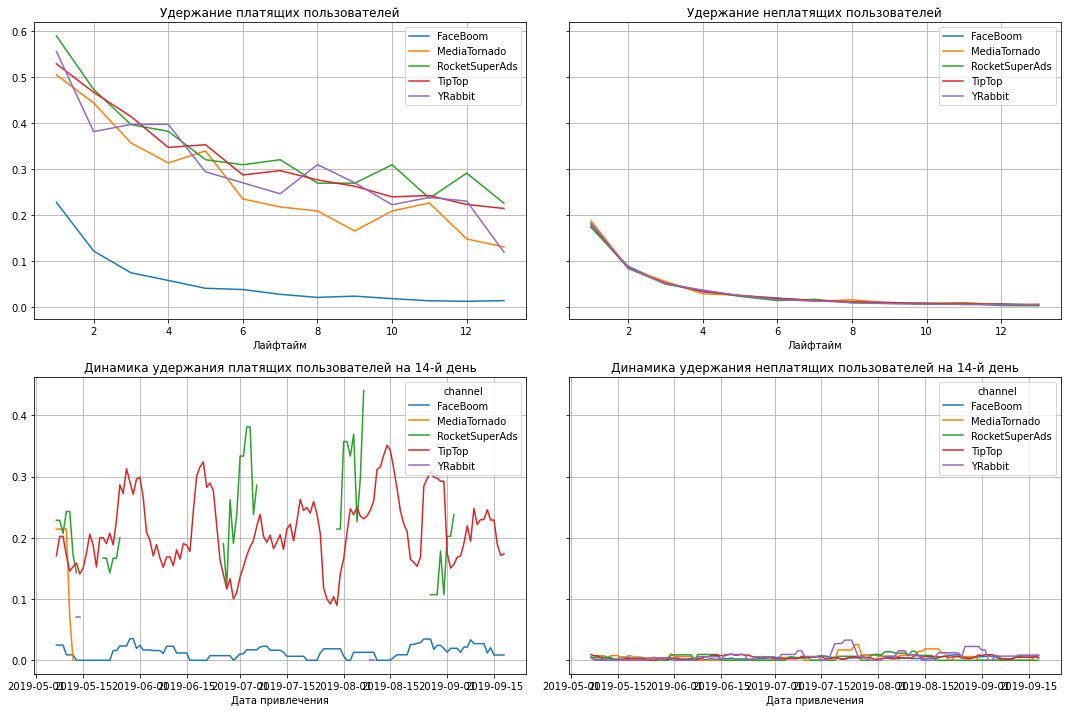

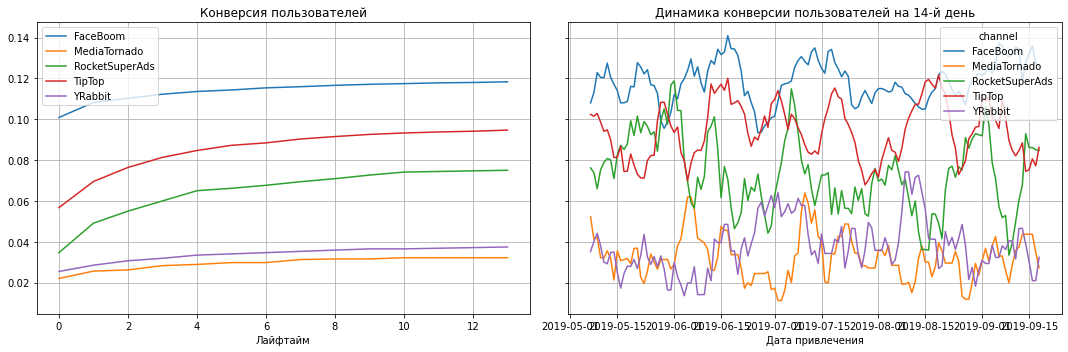

In [54]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_not_organic.query('region == "United States"'),
    visits,
    datetime(2019, 10, 1).date(),
    14,
    dimensions=['channel'],
    ignore_horizon=False,
)
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_not_organic.query('region == "United States"'),
    orders,
    datetime(2019, 10, 1).date(),
    14,
    dimensions=['channel'],
    ignore_horizon=False,
)
plot_retention(retention_grouped, retention_history, 14)
plot_conversion(conversion_grouped, conversion_history, 14)

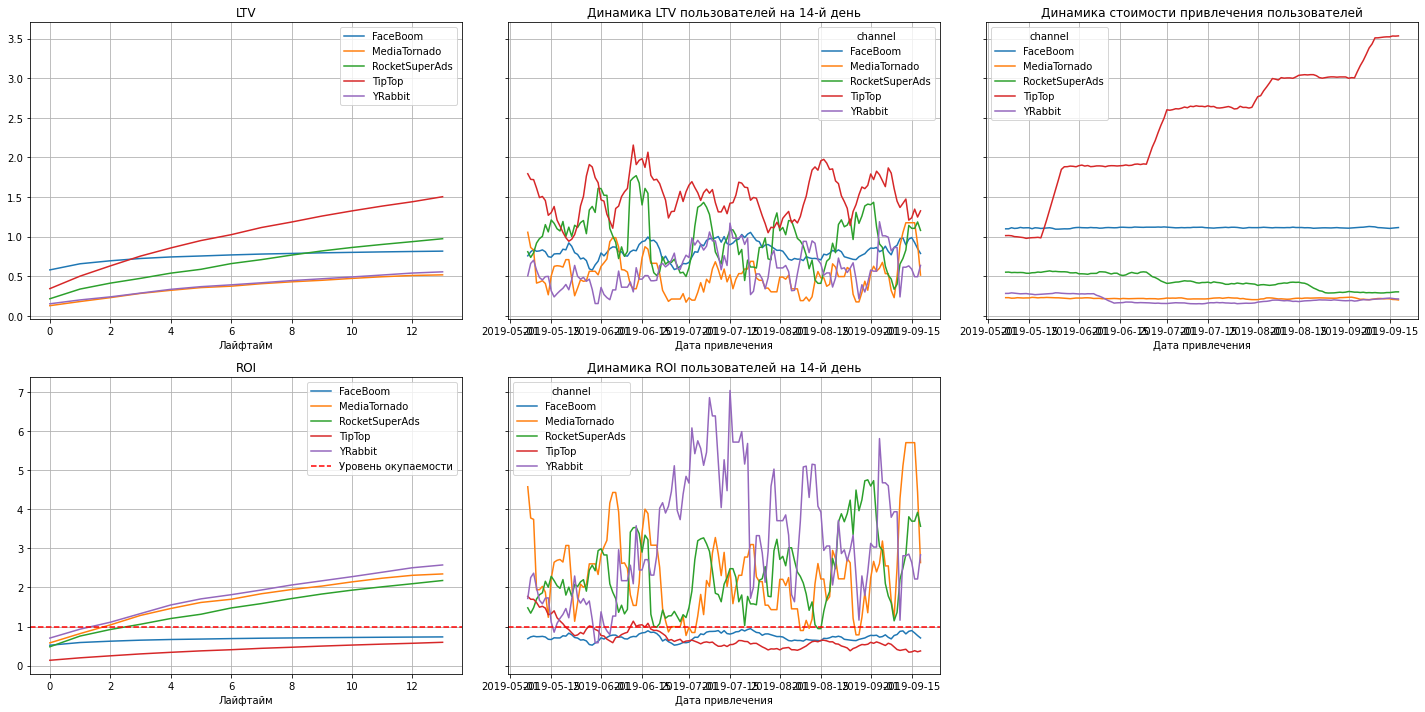

In [55]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles_not_organic.query('region =="United States"'),
    orders,
    datetime(2019, 10, 1).date(),
    14,
    dimensions=['channel'],
    ignore_horizon=False,
)
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14, window=7)

Лчше всех в америке показал себя канал `RocketSuperAds`. У него хорошие показатели конверсии, удержания и ROI. Рекламные компании `YRabbit` и `MediaTornado` также окупаются, но имеют меньшие, чем у `RocketSuperAds` показатели конверсии. Что также можно объяснить недостаточностью финансирования.